In [1]:
import logging
import warnings

from technical_index.binance import get_futures_market_data
from technical_index.index import (build_indicator_parameters,
                                   build_quantitative_analysis)
from technical_index.plot import PlotConfig, plot_candlestick_with_indicators

# 完全屏蔽所有警告
warnings.filterwarnings("ignore")
# 设置日志级别为ERROR，只显示错误信息
logging.basicConfig(level=logging.ERROR)

/Users/gx/ws/jupyter/strategy/technical-index/venv/lib/python3.13/site-packages/pandas_ta/__init__.py:7: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  from pkg_resources import get_distribution, DistributionNotFound


In [2]:
# 获取ETHUSDT的1小时K线数据，限制500条
df = get_futures_market_data("ETHUSDT", "1h", limit=500)
df.tail(5)

,Open,High,Low,Close,Volume,Number_Of_Trades,Taker_Buy_Base_Asset_Volume,Taker_Buy_Quote_Asset_Volume
Open_Time,,,,,,,,
2025-07-11 09:00:00,3002.99,3040.95,2995.18,3014.86,488800.110,358411,250274.574,7.562023e+08
2025-07-11 10:00:00,3014.87,3014.95,2992.00,3003.23,316797.942,275455,152141.743,4.572001e+08
2025-07-11 11:00:00,3003.22,3005.87,2967.55,2983.22,399904.645,329509,176073.958,5.254524e+08
2025-07-11 12:00:00,2983.22,2992.51,2969.04,2985.39,250829.971,253967,132137.088,3.942388e+08
2025-07-11 13:00:00,2985.39,2999.98,2983.01,2989.89,120580.364,141563,59750.847,1.788225e+08


In [3]:
# 构建技术指标参数
indicator_params = build_indicator_parameters(ma_periods=(7, 25, 99))

# 计算技术指标
print("正在计算技术指标...")
df_with_indicators = build_quantitative_analysis(df, **indicator_params)
df_with_indicators.tail(5)

正在计算技术指标...


,Open,High,Low,Close,Volume,Number_Of_Trades,Taker_Buy_Base_Asset_Volume,Taker_Buy_Quote_Asset_Volume,MACD_12_26_9,MACDh_12_26_9,...,CDL_TASUKIGAP,CDL_THRUSTING,CDL_TRISTAR,CDL_UNIQUE3RIVER,CDL_UPSIDEGAP2CROWS,CDL_XSIDEGAP3METHODS,HA_open,HA_high,HA_low,HA_close
Open_Time,,,,,,,,,,,,,,,,,,,,,
2025-07-11 09:00:00,3002.99,3040.95,2995.18,3014.86,488800.110,358411,250274.574,7.562023e+08,61.322673,2.476322,...,0.0,0.0,0.0,0.0,0.0,0.0,2984.890664,3040.950000,2984.890664,3013.4950
2025-07-11 10:00:00,3014.87,3014.95,2992.00,3003.23,316797.942,275455,152141.743,4.572001e+08,59.988105,0.913403,...,0.0,0.0,0.0,0.0,0.0,0.0,2999.192832,3014.950000,2992.000000,3006.2625
2025-07-11 11:00:00,3003.22,3005.87,2967.55,2983.22,399904.645,329509,176073.958,5.254524e+08,56.662639,-1.929650,...,0.0,0.0,0.0,0.0,0.0,0.0,3002.727666,3005.870000,2967.550000,2989.9650
2025-07-11 12:00:00,2983.22,2992.51,2969.04,2985.39,250829.971,253967,132137.088,3.942388e+08,53.584594,-4.006156,...,0.0,0.0,0.0,0.0,0.0,0.0,2996.346333,2996.346333,2969.040000,2982.5400
2025-07-11 13:00:00,2985.39,2999.98,2983.01,2989.89,120580.364,141563,59750.847,1.788225e+08,50.921344,-5.335525,...,0.0,0.0,0.0,0.0,0.0,0.0,2989.443167,2999.980000,2983.010000,2989.5675


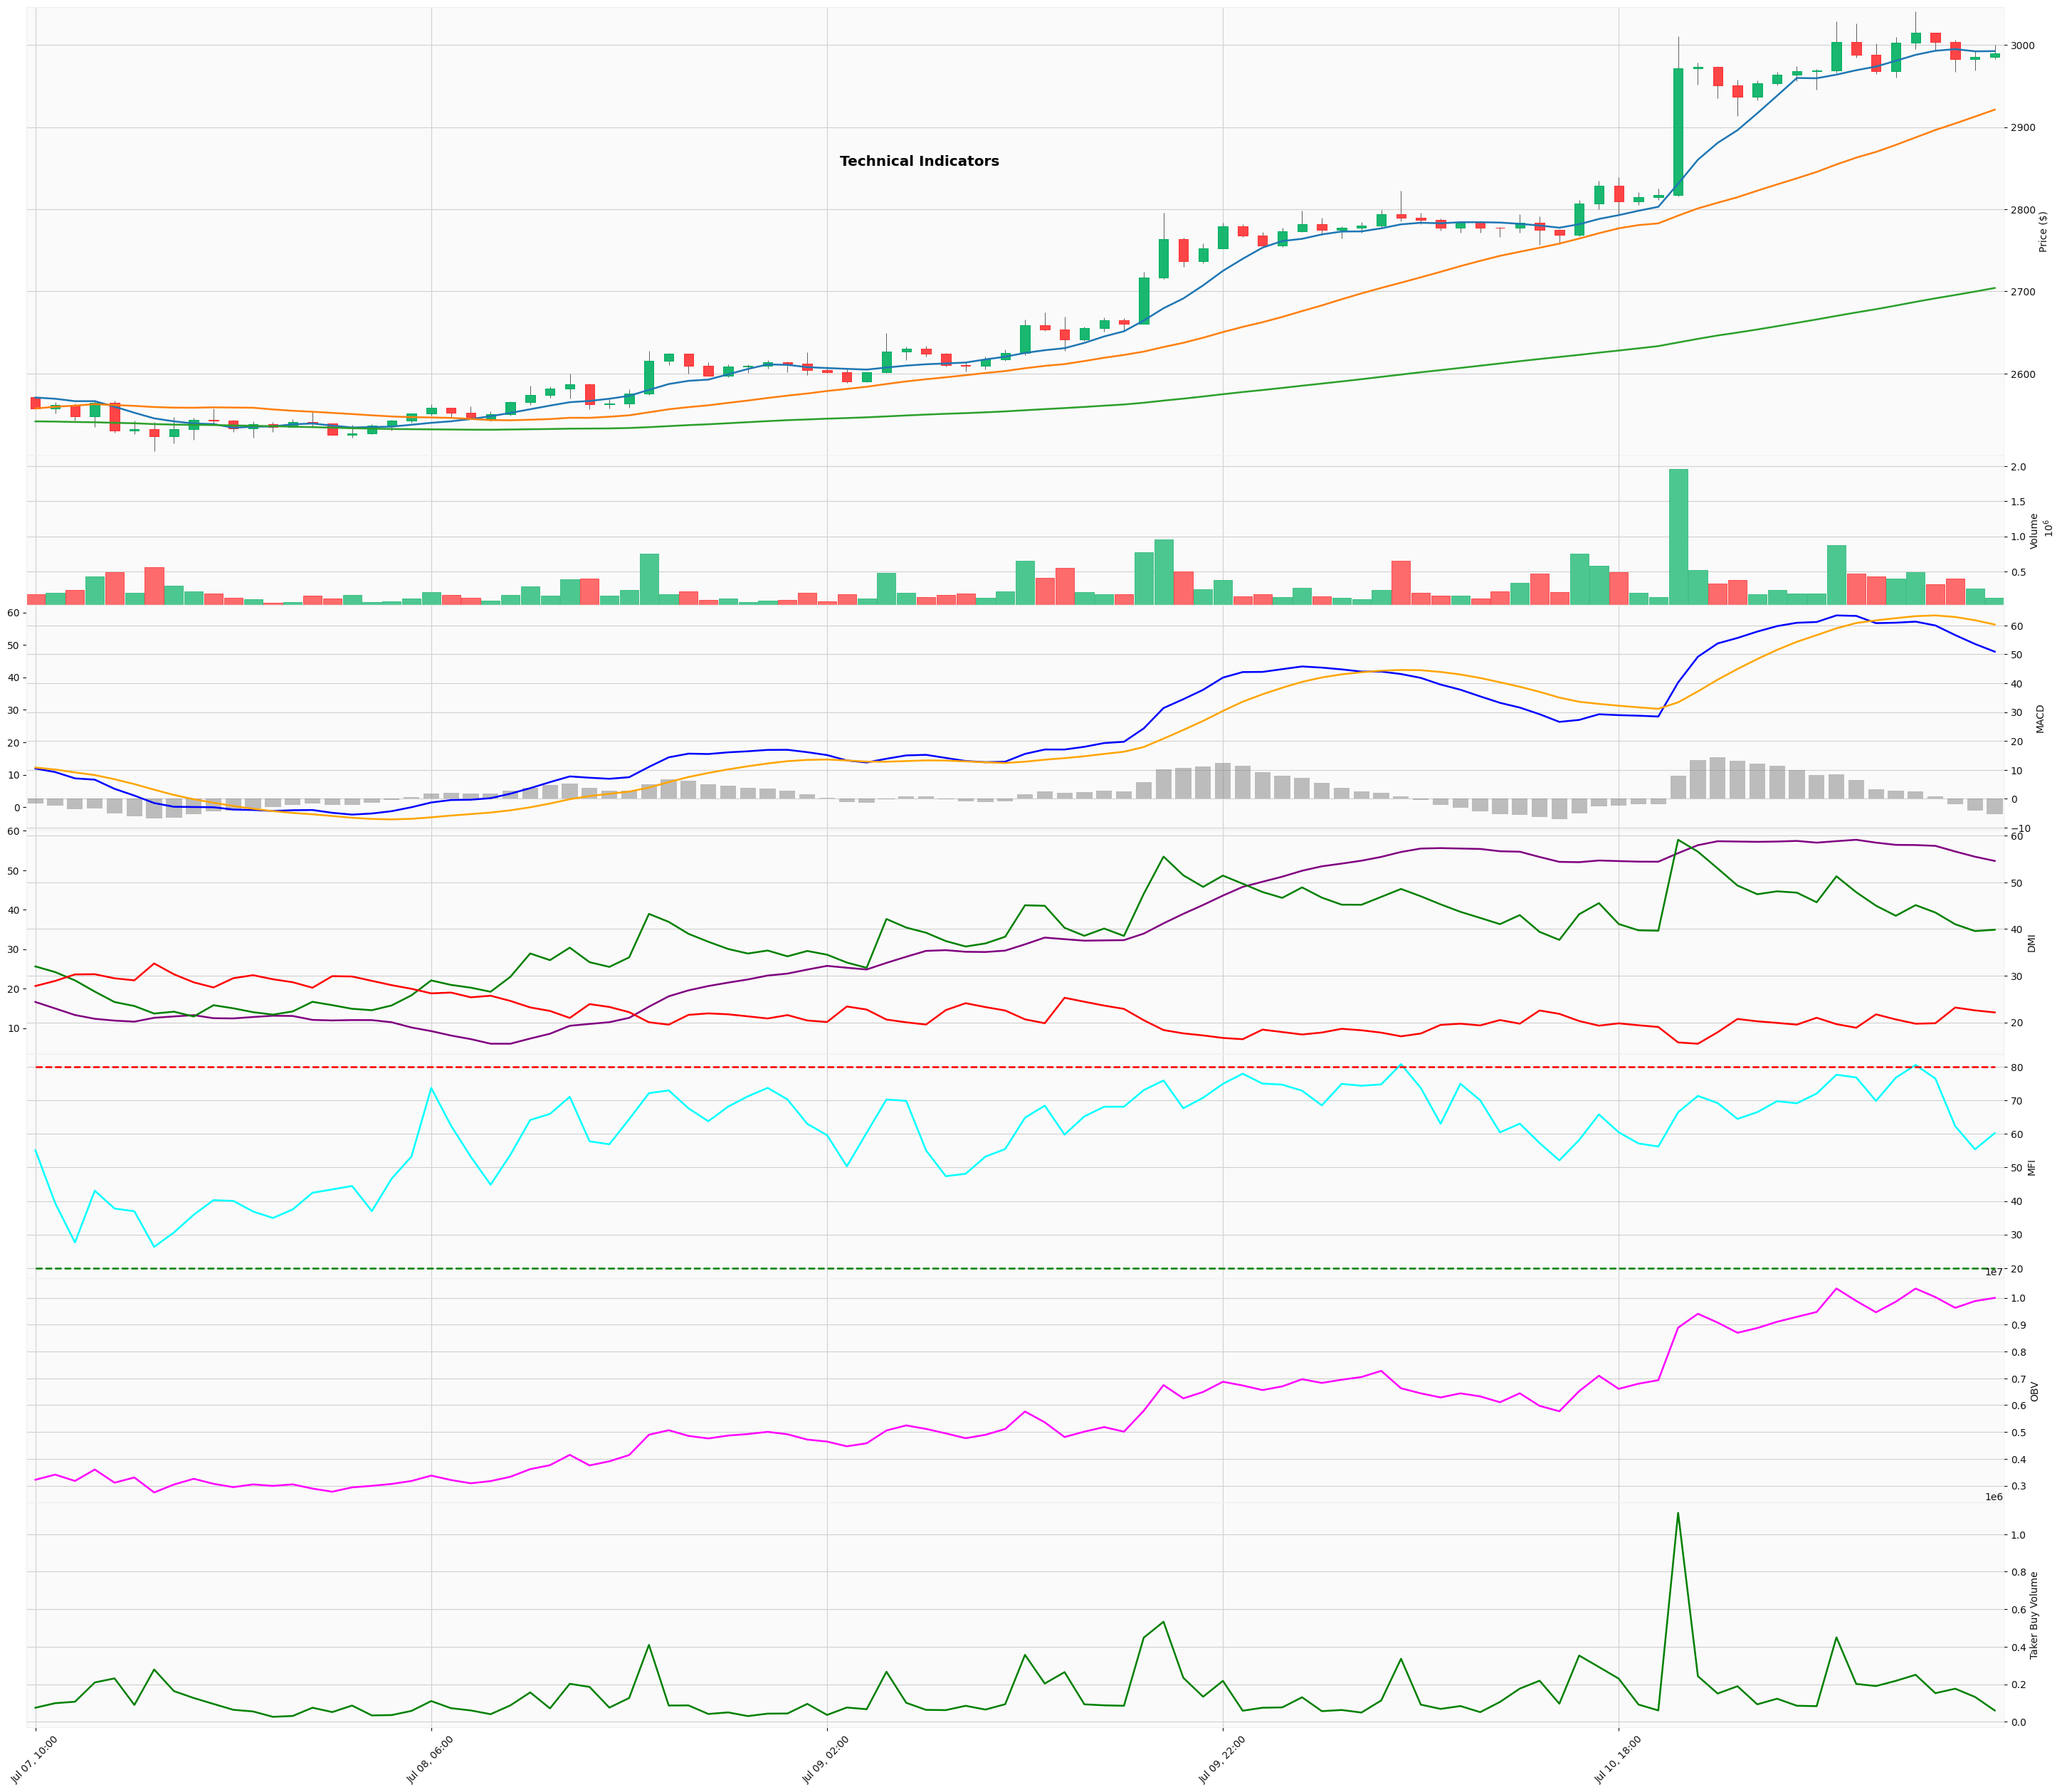

In [4]:
config = PlotConfig(
    indicators=["macd", "dmi", "mfi", "obv", "taker_buy"],
    sma_periods=(7, 25, 99), # 绘制SMA线
    limit=100,
)
plot_candlestick_with_indicators(df_with_indicators, config=config)